# Data wrangling project

### Gather
1. Add twitter csv
2. Programmatically download https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv using the requests library
3. Use tweet_id to query retweet count, favorites (likes), and any additionally interesting data


### Assess
Detect at least 8 quality issues and 2 tidiness issues


### Clean
Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate).


### Storing, Analyzing, Visualizing
1. Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv
2. Analyze and visualize your wrangled data in wrangle_act.ipynb. At least 3 insights and 1 visualization must be produced.
3. Create a 300-600 word written report called wrangle_report.pdf that briefly describes your wrangling efforts. This is to be framed as an internal document.
4. Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
doggos = pd.read_csv('twitter-archive-enhanced.csv')
doggos.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
doggos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
print(doggos.doggo.value_counts())
print(doggos.floofer.value_counts())
print(doggos.pupper.value_counts())
print(doggos.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [5]:
doggos.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
Daisy           7
Bailey          7
Toby            7
Buddy           7
an              7
Rusty           6
Leo             6
Jax             6
Koda            6
Jack            6
Scout           6
Bella           6
Milo            6
Stanley         6
Dave            6
Oscar           6
Bentley         5
             ... 
Willy           1
Lacy            1
Alfy            1
Rambo           1
Sephie          1
Timmy           1
Obie            1
Ozzie           1
Mutt            1
Blue            1
Ralphy          1
Jazzy           1
Lugan           1
such            1
Marlee          1
Fwed            1
Bayley          1
Kanu            1
officially      1
Lorelei         1
Kramer          1
Kuyu            1
Bauer           1
Mason           1
Brandonald

In [6]:
# checking if the set includes duplicate tweets
doggos.tweet_id.nunique()

2356

In [7]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.tail(5)

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
image_predictions.tweet_id.nunique()

2075

In [10]:
# Create a list of all relevant tweet ids
doggos_list = doggos['tweet_id'].tolist()
image_list = image_predictions['tweet_id'].tolist()
id_list = doggos_list + image_list
id_list = list(dict.fromkeys(id_list))
id_list

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [11]:
# gauging the amount of data to be downloaded 
len(id_list)

2356

In [12]:
# import tweepy, removed keys for privacy
import tweepy

consumer_key = '[consumer key]'
consumer_secret = '[consumer secret]'
access_token = '[access token]'
access_secret = '[access secret]'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# testing functionality
tweet = api.get_status(666020888022790149)
print(tweet.text)

Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj


In [13]:
tweet_list = []
for tweetid in id_list:
    try:
        tweet = api.get_status(tweetid)
        favorites = tweet.favorite_count
        retweets = tweet.retweet_count
        tweet_list.append({'tweet_id': tweetid,
                        'favorites': favorites,
                        'retweets': retweets})
    except tweepy.TweepError as e:
        continue

Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 735


In [14]:
len(tweet_list)

2331

In [15]:
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorites', 'retweets'])

In [16]:
tweet_df.head()

tweet_id  favorites  retweets
0  892420643555336193      34891      7320
1  892177421306343426      30220      5468
2  891815181378084864      22743      3612
3  891689557279858688      38168      7516
4  891327558926688256      36426      8070

In [17]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


# Assess

## Doggos:

##### Quality issues:
1. Response to status (in_reply_to_status_id =! NaN)
2. Retweets (retweeted_status_id =! NaN) 
3. Source links are meaningless
4. Timestamp includes both date and time, where time has many decimals 
5. Wrong names, such as "a", "the", and "an" instead of "None" 
6. Column expanded_urls does not contain values for all tweets 
7. Multiple links in expanded_urls instead of one 
8. Rating scores were extracted faulty
9. No column computing / displaying the overall rating (e.g. 12/10 -> 120%)

##### Tidiness issues:
1. Doggo, Floofer, Pupper, and Puppo should be in one column (e.g. "stage")
2. Relevant Tweet data spread across three data frames

## image_predictions:

##### Quality issues:
1. Upper / lower case for predicted names 
2. No clear best estimate of the pictured dog 
3. No overall True / False term for identified dogs across all 3 guesses 

## tweet_df:
Appears to be without error



# Cleaning

## Doggos

In [18]:
# Create clean working copy
doggos_clean = doggos.copy()

In [19]:
doggos_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Quality issues:
1. Response to status (in_reply_to_status_id =! NaN)

##### Define:
Remove tweets which are a reply
##### Code:

In [20]:
# remove replies
doggos_clean = doggos_clean[doggos_clean['in_reply_to_status_id'].isnull()]

2. Retweets (retweeted_status_id =! NaN) 

##### Define:
Remove tweets which are a retweets
##### Code:

In [21]:
# remove retweets
doggos_clean = doggos_clean[doggos_clean['retweeted_status_id'].isnull()]

##### Test:

In [22]:
# only empty cells for replies and retweets should remain
doggos_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [23]:
# drop empty columns
doggos_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                 'retweeted_status_timestamp'], inplace=True)

3. Source links are meaningless

##### Define:
Remove source column
##### Code:

In [24]:
# drop faulty source links (after confirming all entries are meaningless iPhone links)
doggos_clean.drop(columns = ['source'], inplace=True)

##### Test:

In [25]:
doggos_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

4. Timestamp includes both date and time, where time has many decimals 

##### Define:
Split up the the timestamp column into two new ones and clean the respective day / time entry if necessary
##### Code:

In [26]:
# split up timestamp
doggos_clean[['date','time']] = doggos_clean.timestamp.str.split(' ',1,expand=True)

In [27]:
doggos_clean.drop(['timestamp'], axis=1)

tweet_id                                               text  \
0     892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1     892177421306343426  This is Tilly. She's just checking pup on you....   
2     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3     891689557279858688  This is Darla. She commenced a snooze mid meal...   
4     891327558926688256  This is Franklin. He would like you to stop ca...   
5     891087950875897856  Here we have a majestic great white breaching ...   
6     890971913173991426  Meet Jax. He enjoys ice cream so much he gets ...   
7     890729181411237888  When you watch your owner call another dog a g...   
8     890609185150312448  This is Zoey. She doesn't want to be one of th...   
9     890240255349198849  This is Cassie. She is a college pup. Studying...   
10    890006608113172480  This is Koda. He is a South Australian decksha...   
11    889880896479866881  This is Bruno. He is a service shark. Only get...   
12    889665388333682689  Here's a puppo that seems to be on the fence a...   
13    889638837579907072  This is Ted. He does his best. Sometimes that'...   
14    889531135344209921  This is Stuart. He's sporting his favorite fan...   
15    889278841981685760  This is Oliver. You're witnessing one of his m...   
16    888917238123831296  This is Jim. He found a fren. Taught him how t...   
17    888804989199671297  This is Zeke. He has a new stick. Very proud o...   
18    888554962724278272  This is Ralphus. He's powering up. Attempting ...   
20    888078434458587136  This is Gerald. He was just told he didn't get...   
21    887705289381826560  This is Jeffrey. He has a monopoly on the pool...   
22    887517139158093824  I've yet to rate a Venezuelan Hover Wiener. Th...   
23    887473957103951883  This is Canela. She attempted some fancy porch...   
24    887343217045368832  You may not have known you needed to see this ...   
25    887101392804085760  This... is a Jubilant Antarctic House Bear. We...   
26    886983233522544640  This is Maya. She's very shy. Rarely leaves he...   
27    886736880519319552  This is Mingus. He's a wonderful father to his...   
28    886680336477933568  This is Derek. He's late for a dog meeting. 13...   
29    886366144734445568  This is Roscoe. Another pupper fallen victim t...   
31    886258384151887873  This is Waffles. His doggles are pupside down....   
...                  ...                                                ...   
2326  666411507551481857  This is quite the dog. Gets really excited whe...   
2327  666407126856765440  This is a southern Vesuvius bumblegruff. Can d...   
2328  666396247373291520  Oh goodness. A super rare northeast Qdoba kang...   
2329  666373753744588802  Those are sunglasses and a jean jacket. 11/10 ...   
2330  666362758909284353  Unique dog here. Very small. Lives in containe...   
2331  666353288456101888  Here we have a mixed Asiago from the Galápagos...   
2332  666345417576210432  Look at this jokester thinking seat belt laws ...   
2333  666337882303524864  This is an extremely rare horned Parthenon. No...   
2334  666293911632134144  This is a funny dog. Weird toes. Won't come do...   
2335  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   
2336  666273097616637952     Can take selfies 11/10 https://t.co/ws2AMaNwPW   
2337  666268910803644416  Very concerned about fellow dog trapped in com...   
2338  666104133288665088  Not familiar with this breed. No tail (weird)....   
2339  666102155909144576  Oh my. Here you are seeing an Adobe Setter giv...   
2340  666099513787052032  Can stand on stump for what seems like a while...   
2341  666094000022159362  This appears to be a Mongolian Presbyterian mi...   
2342  666082916733198337  Here we have a well-established sunblockerspan...   
2343  666073100786774016  Let's hope this flight isn't Malaysian (lol). ...   
2344  666071193221509120  Here we have a northern speckled Rhodode

In [28]:
# fixing time column
doggos_clean['time'] = doggos_clean['time'].str[:-5]
doggos_clean['time']

0       16:23:56 
1       00:17:27 
2       00:18:03 
3       15:58:51 
4       16:00:24 
5       00:08:17 
6       16:27:12 
7       00:22:40 
8       16:25:51 
9       15:59:51 
10      00:31:25 
11      16:11:53 
12      01:55:32 
13      00:10:02 
14      17:02:04 
15      00:19:32 
16      00:22:39 
17      16:56:37 
18      00:23:06 
20      16:49:33 
21      16:06:48 
22      03:39:09 
23      00:47:34 
24      16:08:03 
25      00:07:08 
26      16:17:36 
27      23:58:41 
28      20:14:00 
29      23:25:31 
31      16:17:19 
          ...    
2326    00:24:19 
2327    00:06:54 
2328    23:23:41 
2329    21:54:18 
2330    21:10:36 
2331    20:32:58 
2332    20:01:42 
2333    19:31:45 
2334    16:37:02 
2335    16:11:11 
2336    15:14:19 
2337    14:57:41 
2338    04:02:55 
2339    03:55:04 
2340    03:44:34 
2341    03:22:39 
2342    02:38:37 
2343    01:59:36 
2344    01:52:02 
2345    01:22:45 
2346    01:01:59 
2347    00:55:59 
2348    00:49:46 
2349    00:35:11 
2350    00

###### Test:

In [29]:
doggos_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo        date  \
0                  10   Phineas  None    None   None  None  2017-08-01   
1                  10     Tilly  None    None   None  None  2017-08-01   
2                  10    Archie  None    None   None  None  2017-07-31   
3                  10     Darla  None    None   None  None  2017-07-30   
4                  10  Franklin  None    None   None  None  2017-07-29   

        time  
0  16:23:56   
1  00:17:27   
2  00:18:03   
3  15:58:51   
4  16:00:24

5. Wrong names, such as "a", "the", and "an" instead of "None" 

##### Define:
Check the names column for lower case entries to find wrong name entries (which should always be higher case) and drop them
##### Code:

In [30]:
doggos_clean[doggos_clean.name.str.islower()].name.value_counts()

a               55
the              8
an               6
very             4
one              4
quite            3
just             3
actually         2
getting          2
not              2
his              1
such             1
this             1
old              1
officially       1
light            1
infuriating      1
my               1
all              1
life             1
mad              1
unacceptable     1
incredibly       1
space            1
by               1
Name: name, dtype: int64

In [31]:
# dropping faulty names

name_list = ['a', 'the', 'an', 'one', 'very', 'just', 'quite', 'not', 'getting', 'actually', 'officially', 'light', 'my', 'all',
            'unacceptable', 'old', 'infuriating', 'mad', 'life', 'his', 'space', 'this', 'by', 'incredibly', 'such']
for _ in name_list:
    doggos_clean.name.replace(_, "None", inplace=True)

##### Test:

In [32]:
# this should return nothing
doggos_clean[doggos_clean.name.str.islower()].name.value_counts()

Series([], Name: name, dtype: int64)

6. Column expanded_urls does not contain values for all tweets
7. Multiple links in expanded_urls instead of one 

##### Define:
Expanded_urls contains many faulty entries. Solving this by recreating the link via the tweet id and a "help column" which is dropped afterwards
##### Code:

In [33]:
# fixing links
doggos_clean['url_help'] = "https://twitter.com/dog_rates/status/"
doggos_clean['expanded_url'] = doggos_clean['url_help'].astype(str) + doggos_clean['tweet_id'].astype(str)
doggos_clean['expanded_urls'] = doggos_clean['expanded_url']
doggos_clean.drop(columns = ["expanded_url", "url_help"], inplace=True)
doggos_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo        date  \
0                  10   Phineas  None    None   None  None  2017-08-01   
1                  10     Tilly  None    None   None  None  2017-08-01   
2                  10    Archie  None    None   None  None  2017-07-31   
3                  10     Darla  None    None   None  None  2017-07-30   
4                  10  Franklin  None    None   None  None  2017-07-29   

        time  
0  16:23:56   
1  00:17:27   
2  00:18:03   
3  15:58:51   
4  16:00:24

##### Test:

In [34]:
doggos_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
date                  2097 non-null object
time                  2097 non-null object
dtypes: int64(3), object(10)
memory usage: 229.4+ KB


8. Rating scores were extracted faulty

##### Define:
Rating scores in the doggos df have been created in a faulty way (info given by instructions). Reextracting the numbers from the text strings to create new, corrected scores
##### Code:

In [35]:
# re-extract faulty ratings
doggos_clean['rating_data'] = doggos_clean.text.str.extract('([0-9]{1,3}/\d+)', expand=True)
doggos_clean['rating_score'], doggos_clean['rating_range'] = doggos_clean['rating_data'].str.split('/', 0).str
doggos_clean = doggos_clean.drop('rating_data', axis = 1)
doggos_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo        date  \
0                  10   Phineas  None    None   None  None  2017-08-01   
1                  10     Tilly  None    None   None  None  2017-08-01   
2                  10    Archie  None    None   None  None  2017-07-31   
3                  10     Darla  None    None   None  None  2017-07-30   
4                  10  Franklin  None    None   None  None  2017-07-29   

        time rating_score rating_range  
0  16:23:56            13           10  
1  00:17:27            13           10  
2  00:18:03            12           10  
3  15:58:51            13           10  
4  16:00:24            12           10

In [36]:
# fix ratings
doggos_clean['rating_numerator'] = doggos_clean['rating_score']
doggos_clean['rating_denominator'] = doggos_clean['rating_range']

doggos_clean = doggos_clean.drop(['rating_score', 'rating_range'], axis = 1)

doggos_clean['rating_numerator'] = doggos_clean['rating_numerator'].astype(float)
doggos_clean['rating_denominator'] = doggos_clean['rating_denominator'].astype(float)

9. No column computing / displaying the overall rating (e.g. 12/10 -> 120%)

##### Define:
Creating a new column including a quick calculation for an overall rating score
##### Code:

In [37]:
# create a rating score
doggos_clean['rating'] = doggos_clean['rating_numerator'] / doggos_clean['rating_denominator']

##### Test:

In [38]:
doggos_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name doggo floofer pupper puppo        date  \
0                10.0   Phineas  None    None   None  None  2017-08-01   
1                10.0     Tilly  None    None   None  None  2017-08-01   
2                10.0    Archie  None    None   None  None  2017-07-31   
3                10.0     Darla  None    None   None  None  2017-07-30   
4                10.0  Franklin  None    None   None  None  2017-07-29   

        time  rating  
0  16:23:56      1.3  
1  00:17:27      1.3  
2  00:18:03      1.2  
3  15:58:51      1.3  
4  16:00:24      1.2

##### Tidiness issues:
1. Doggo, Floofer, Pupper, and Puppo should be in one column (e.g. "stage")

##### Define:
Create a new stage column, which checks the four stage cells for content and returns no_tage_detected if there is no entry. Otherwise, existing entry is copied.
##### Code:

In [39]:
# Fit doggo, floofer, pupper, and puppo stages into one column
doggos_clean.loc[doggos_clean['doggo'] == 'doggo', 'stage'] = 'doggo'
doggos_clean.fillna(" ",inplace=True)
doggos_clean.loc[(doggos_clean['floofer'] == 'floofer')&(doggos_clean['stage'] == " "), 'stage'] = 'floofer'
doggos_clean.loc[(doggos_clean['pupper'] == 'pupper')&(doggos_clean['stage'] == " "), 'stage'] = 'pupper'
doggos_clean.loc[(doggos_clean['puppo'] == 'puppo')&(doggos_clean['stage'] == " "), 'stage'] = 'puppo'
doggos_clean.loc[doggos_clean['stage'] == " ", 'stage'] = "no_stage_detected"

##### Test:

In [40]:
doggos_clean.stage.value_counts()

no_stage_detected    1761
pupper                221
doggo                  83
puppo                  23
floofer                 9
Name: stage, dtype: int64

In [41]:
# create final doggos df
doggos_final = doggos_clean[['tweet_id', 'time', 'date', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'rating', 'name', 'stage']].copy()
doggos_final.head()

tweet_id       time        date  \
0  892420643555336193  16:23:56   2017-08-01   
1  892177421306343426  00:17:27   2017-08-01   
2  891815181378084864  00:18:03   2017-07-31   
3  891689557279858688  15:58:51   2017-07-30   
4  891327558926688256  16:00:24   2017-07-29   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator  rating      name              stage  
0                10.0     1.3   Phineas  no_stage_detected  
1                10.0     1.3     Tilly  no_stage_detected  
2                10.0     1.2    Archie  no_stage_detected  
3                10.0     1.3     Darla  no_stage_detected  
4                10.0     1.2  Franklin  no_stage_detected

# image_predictions

##### Quality issues:
1. Upper / lower case for predicted names 

##### Define:
To promote consistency, turn all entries in p1, p2, and p3 lowercase
##### Code:

In [42]:
# turning all entries into lowercase
image_predictions['p1'] = image_predictions['p1'].str.lower()
image_predictions['p2'] = image_predictions['p2'].str.lower()
image_predictions['p3'] = image_predictions['p3'].str.lower()

###### Test:

In [43]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         german_shepherd  0.596461    True            malinois   
3        1     rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    shetland_sheepdog  0.061428    True  
1  0.074192    True  rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             doberman  0.154629    True

2. No clear best estimate of the pictured dog 

##### Define:
To promote consistency, take the guess with the highest probability, if a dog was detected.
##### Code:

In [44]:
# determining a "main" prediction
image_predictions_clean = image_predictions.copy()
image_predictions_clean.loc[image_predictions_clean['p1_dog'] == True, 'best_guess'] = image_predictions_clean['p1']
image_predictions_clean.fillna(" ",inplace=True)
image_predictions_clean.loc[(image_predictions_clean['p2_dog'] == True) & (image_predictions_clean['best_guess'] == " "), 'best_guess'] = image_predictions_clean['p2']
image_predictions_clean.loc[(image_predictions_clean['p3_dog'] == True) & (image_predictions_clean['best_guess'] == " "), 'best_guess'] = image_predictions_clean['p3']
image_predictions_clean.loc[image_predictions_clean['best_guess'] == " ", 'best_guess'] = "no_dog_detected"

##### Test:

In [45]:
image_predictions_clean.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         german_shepherd  0.596461    True            malinois   
3        1     rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          rottweiler   
5        1    bernese_mountain_dog  0.651137    True    english_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  \
0  0.156665    True            shetland_sheepdog  0.061428    True   
1  0.074192    True          rhodesian_ridgeback  0.072010    True   
2  0.138584    True                   bloodhound  0.116197    True   
3  0.360687    True           miniature_pinscher  0.222752    True   
4  0.243682    True                     doberman  0.154629    True   
5  0.263788    True   greater_swiss_mountain_dog  0.016199    True   
6  0.045885   False                     terrapin  0.017885   False   
7  0.058279    True                     fur_coat  0.054449   False   
8  0.014594   False             golden_retriever  0.007959    True   
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True   

               best_guess  
0  welsh_springer_spaniel  
1                 redbone  
2         german_shepherd  
3     rhodesian_ridgeback  
4      miniature_pinscher  
5    bernese_mountain_dog  
6         no_dog_detected  
7                    chow  
8        golden_retriever  
9        miniature_poodle

3. No overall True / False term for identified dogs across all 3 guesses 

##### Define:
To enhance the table's usability, add a column stating if a dog was idenified or not.
##### Code:

In [46]:
# establishing whether or not a dog was detected
image_predictions_final = image_predictions_clean[['tweet_id', 'jpg_url', 'img_num', 'best_guess']].copy()
image_predictions_final.loc[image_predictions_final['best_guess'] == "no_dog_detected", 'dog'] = "False"
image_predictions_final.fillna(" ",inplace=True)
image_predictions_final.loc[image_predictions_final['dog'] == " ", 'dog'] = "True"


##### Test:

In [47]:
image_predictions_final.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num              best_guess    dog  
0        1  welsh_springer_spaniel   True  
1        1                 redbone   True  
2        1         german_shepherd   True  
3        1     rhodesian_ridgeback   True  
4        1      miniature_pinscher   True  
5        1    bernese_mountain_dog   True  
6        1         no_dog_detected  False  
7        1                    chow   True  
8        1        golden_retriever   True  
9        1        miniature_poodle   True

# Merging

##### Tidiness issues:
2. Relevant Tweet data spread across three data frames

##### Define:
Bundle all tweet related data into one dataframe
##### Code:

In [48]:
# final step after gathering/assessing/cleaning the three dataframes
master_df = pd.merge(doggos_final, image_predictions_final,
                            on=['tweet_id'], how='outer')
master_df = pd.merge(master_df, tweet_df,
                            on=['tweet_id'], how='outer')

##### Check:

In [49]:
master_df.head()

tweet_id       time        date  \
0  892420643555336193  16:23:56   2017-08-01   
1  892177421306343426  00:17:27   2017-08-01   
2  891815181378084864  00:18:03   2017-07-31   
3  891689557279858688  15:58:51   2017-07-30   
4  891327558926688256  16:00:24   2017-07-29   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator  rating      name              stage  \
0                10.0     1.3   Phineas  no_stage_detected   
1                10.0     1.3     Tilly  no_stage_detected   
2                10.0     1.2    Archie  no_stage_detected   
3                10.0     1.3     Darla  no_stage_detected   
4                10.0     1.2  Franklin  no_stage_detected   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   

           best_guess    dog  favorites  retweets  
0     no_dog_detected  False    34891.0    7320.0  
1           chihuahua   True    30220.0    5468.0  
2           chihuahua   True    22743.0    3612.0  
3  labrador_retriever   True    38168.0    7516.0  
4              basset   True    36426.0    8070.0

In [50]:
master_df.sample(5)

tweet_id       time        date  \
262   832682457690300417  20:05:43   2017-02-17   
1632  675111688094527488  00:35:44   2015-12-11   
420   807010152071229440  23:53:08   2016-12-08   
1127  704134088924532736  02:40:23   2016-02-29   
1573  676811746707918848  17:11:09   2015-12-15   

                                                   text  \
262   Prosperous good boy 13/10 socioeconomic af htt...   
1632  Say hello to Oliver. He thought what was insid...   
420   This is Lennon. He's a Boopershnoop Pupperdoop...   
1127  This sneezy pupper is just adorable af. 12/10 ...   
1573  Say hello to Penny &amp; Gizmo. They are pract...   

                                          expanded_urls  rating_numerator  \
262   https://twitter.com/dog_rates/status/832682457...              13.0   
1632  https://twitter.com/dog_rates/status/675111688...               8.0   
420   https://twitter.com/dog_rates/status/807010152...              12.0   
1127  https://twitter.com/dog_rates/status/704134088...              12.0   
1573  https://twitter.com/dog_rates/status/676811746...               9.0   

      rating_denominator  rating    name              stage  \
262                 10.0     1.3    None  no_stage_detected   
1632                10.0     0.8  Oliver  no_stage_detected   
420                 10.0     1.2  Lennon  no_stage_detected   
1127                10.0     1.2    None             pupper   
1573                10.0     0.9   Penny  no_stage_detected   

                                              jpg_url  img_num  \
262                                               NaN      NaN   
1632  https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg      1.0   
420   https://pbs.twimg.com/media/CzMTcZoXUAEKqEt.jpg      1.0   
1127                                              NaN      NaN   
1573  https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg      1.0   

              best_guess   dog  favorites  retweets  
262                  NaN   NaN    11527.0    2798.0  
1632  labrador_retriever  True      893.0     225.0  
420     golden_retriever  True    12897.0    3776.0  
1127                 NaN   NaN     1440.0     434.0  
1573           chihuahua  True     1351.0     403.0

In [51]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 16 columns):
tweet_id              2347 non-null int64
time                  2097 non-null object
date                  2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
rating                2097 non-null float64
name                  2097 non-null object
stage                 2097 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
best_guess            2075 non-null object
dog                   2075 non-null object
favorites             2331 non-null float64
retweets              2331 non-null float64
dtypes: float64(6), int64(1), object(9)
memory usage: 311.7+ KB


In [52]:
master_df.dropna(inplace=True)

In [53]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2096
Data columns (total 16 columns):
tweet_id              1964 non-null int64
time                  1964 non-null object
date                  1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null float64
rating                1964 non-null float64
name                  1964 non-null object
stage                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null float64
best_guess            1964 non-null object
dog                   1964 non-null object
favorites             1964 non-null float64
retweets              1964 non-null float64
dtypes: float64(6), int64(1), object(9)
memory usage: 260.8+ KB


# Storing

In [54]:
# storing df as csv
master_df.to_csv('twitter_archive_master.csv')

# Analysis

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# re-load data
twitter_archive = pd.read_csv('twitter_archive_master.csv')
twitter_archive.head()

Unnamed: 0            tweet_id       time        date  \
0           0  892420643555336193  16:23:56   2017-08-01   
1           1  892177421306343426  00:17:27   2017-08-01   
2           2  891815181378084864  00:18:03   2017-07-31   
3           3  891689557279858688  15:58:51   2017-07-30   
4           4  891327558926688256  16:00:24   2017-07-29   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator  rating      name              stage  \
0                10.0     1.3   Phineas  no_stage_detected   
1                10.0     1.3     Tilly  no_stage_detected   
2                10.0     1.2    Archie  no_stage_detected   
3                10.0     1.3     Darla  no_stage_detected   
4                10.0     1.2  Franklin  no_stage_detected   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   

           best_guess    dog  favorites  retweets  
0     no_dog_detected  False    34891.0    7320.0  
1           chihuahua   True    30220.0    5468.0  
2           chihuahua   True    22743.0    3612.0  
3  labrador_retriever   True    38168.0    7516.0  
4              basset   True    36426.0    8070.0

In [57]:
twitter_archive.drop(['Unnamed: 0'], axis=1, inplace=True)

In [58]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 16 columns):
tweet_id              1964 non-null int64
time                  1964 non-null object
date                  1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null float64
rating                1964 non-null float64
name                  1964 non-null object
stage                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null float64
best_guess            1964 non-null object
dog                   1964 non-null bool
favorites             1964 non-null float64
retweets              1964 non-null float64
dtypes: bool(1), float64(6), int64(1), object(8)
memory usage: 232.2+ KB


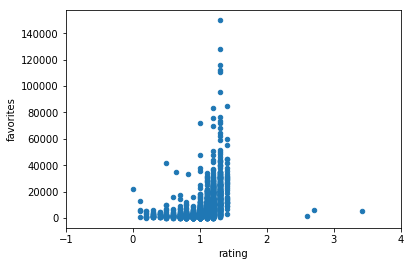

In [59]:
twitter_archive.plot(x="rating", y="favorites", kind="scatter", xlim=[-1,4])

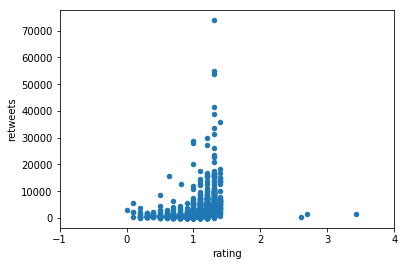

In [60]:
twitter_archive.plot(x="rating", y="retweets", kind="scatter", xlim=[-1,4])

#### It appears that posts with a rating of 1.3 (provided as 13/10) achieve both the most favorites ('likes') and retweets 

In [61]:
twitter_archive.groupby('img_num').mean()

tweet_id  rating_numerator  rating_denominator    rating  \
img_num                                                                       
1.0      730006745650968704         11.701661           10.521945  1.112731   
2.0      765064600605141888         11.735450           10.317460  1.135450   
3.0      775685464917097856         11.644068           10.016949  1.163020   
4.0      799583808167400192         12.400000           10.000000  1.240000   

              dog     favorites     retweets  
img_num                                       
1.0      0.836299   7371.794781  2173.262752  
2.0      0.894180  11659.513228  3320.312169  
3.0      0.898305  11680.610169  3559.610169  
4.0      0.900000  14418.133333  4132.433333

In [62]:
twitter_archive.groupby('img_num')['rating', 'favorites', 'retweets'].mean()

rating     favorites     retweets
img_num                                     
1.0      1.112731   7371.794781  2173.262752
2.0      1.135450  11659.513228  3320.312169
3.0      1.163020  11680.610169  3559.610169
4.0      1.240000  14418.133333  4132.433333

In [63]:
twitter_archive.groupby('img_num').count()

tweet_id  time  date  text  expanded_urls  rating_numerator  \
img_num                                                                
1.0          1686  1686  1686  1686           1686              1686   
2.0           189   189   189   189            189               189   
3.0            59    59    59    59             59                59   
4.0            30    30    30    30             30                30   

         rating_denominator  rating  name  stage  jpg_url  best_guess   dog  \
img_num                                                                       
1.0                    1686    1686  1686   1686     1686        1686  1686   
2.0                     189     189   189    189      189         189   189   
3.0                      59      59    59     59       59          59    59   
4.0                      30      30    30     30       30          30    30   

         favorites  retweets  
img_num                       
1.0           1686      1686  
2.0            189       189  
3.0             59        59  
4.0             30        30

#### Most posts only feature one image, however, two images attract, on average, the most amount of favorites ('likes'). Only posts with four images achieved (marginally) more retweets. Given, however, the small sample size of posts with four images (n=27 vs n=119 for posts with two images), two-image-posts seem to most reliably generate good resonances

In [64]:
twitter_archive.groupby('stage')['rating', 'favorites', 'retweets'].mean()

rating     favorites     retweets
stage                                                 
doggo              1.177778  17936.305556  6063.694444
floofer            1.200000  11600.428571  4144.428571
no_stage_detected  1.120026   7603.540313  2186.587846
pupper             1.071642   6466.860697  2009.328358
puppo              1.200000  20211.545455  5548.590909

In [65]:
twitter_archive.groupby('stage').count()

tweet_id  time  date  text  expanded_urls  \
stage                                                          
doggo                    72    72    72    72             72   
floofer                   7     7     7     7              7   
no_stage_detected      1662  1662  1662  1662           1662   
pupper                  201   201   201   201            201   
puppo                    22    22    22    22             22   

                   rating_numerator  rating_denominator  rating  name  \
stage                                                                   
doggo                            72                  72      72    72   
floofer                           7                   7       7     7   
no_stage_detected              1662                1662    1662  1662   
pupper                          201                 201     201   201   
puppo                            22                  22      22    22   

                   jpg_url  img_num  best_guess   dog  favorites  retweets  
stage                                                                       
doggo                   72       72          72    72         72        72  
floofer                  7        7           7     7          7         7  
no_stage_detected     1662     1662        1662  1662       1662      1662  
pupper                 201      201         201   201        201       201  
puppo                   22       22          22    22         22        22

#### While the large amount of dogs without a clear stage blurs the overall picture, doggos and puppos appear to be the most popular dog stages, measured by favorites and retweets

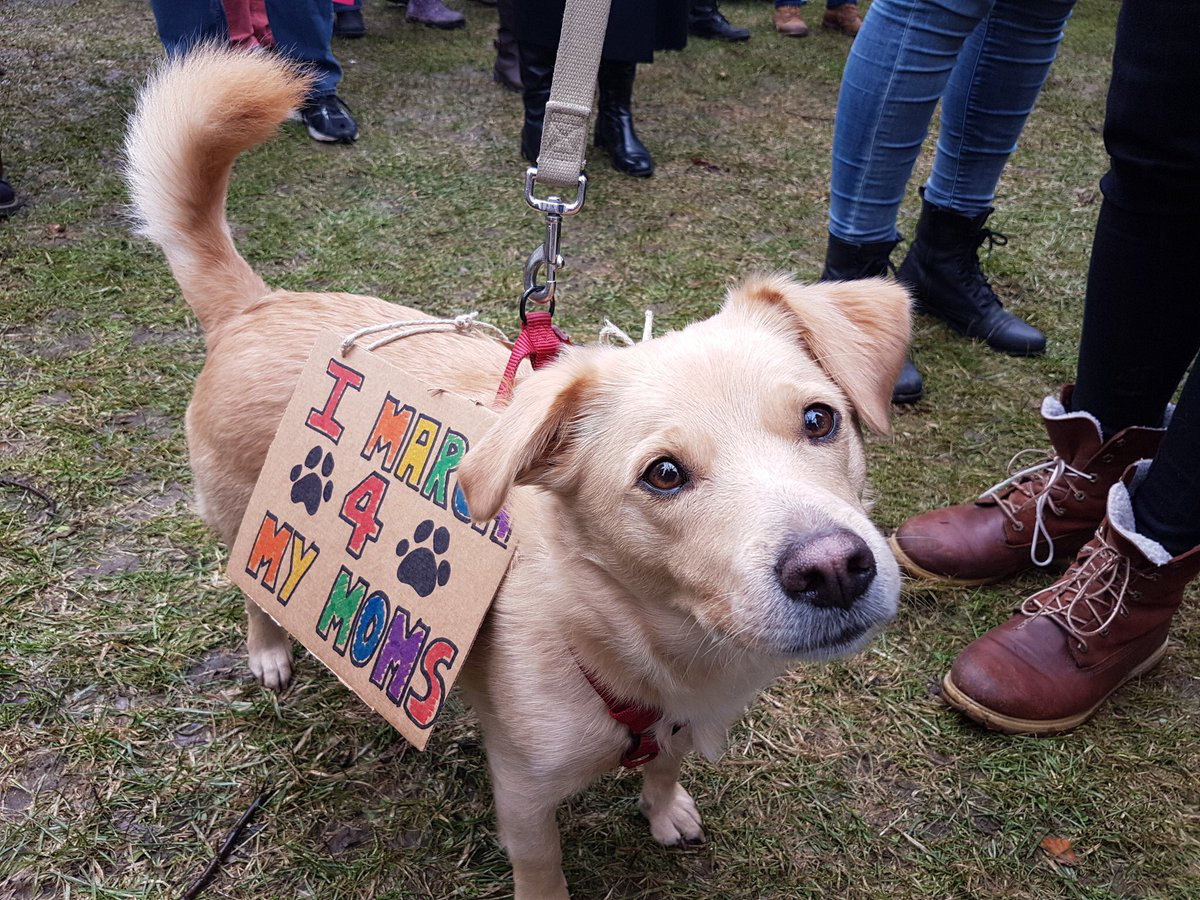

In [66]:
from PIL import Image
from io import BytesIO

twitter_archive.sort_values(by=['favorites'], ascending=False, inplace= True)
favorites = twitter_archive.iloc[1,10]

response = requests.get(favorites)
img = Image.open(BytesIO(response.content))
img

#### The dog who achieved the most Favorites on WeRateDogs (out of the sample)

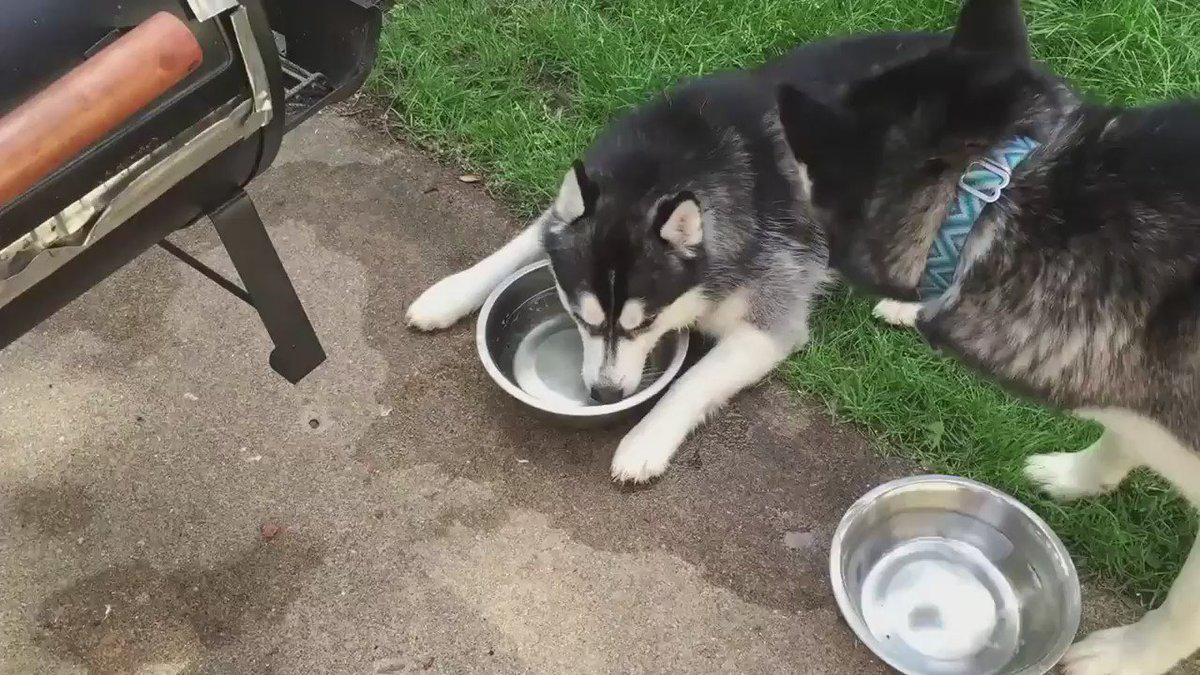

In [67]:
twitter_archive.sort_values(by=['retweets'], ascending=False, inplace= True)
retweets = twitter_archive.iloc[1,10]
response = requests.get(retweets)
img = Image.open(BytesIO(response.content))
img

#### The dog who achieved the most retweets on WeRateDogs (out of the sample)